#문제1

다음중 Supervised learning과 Unsupervised learning에 대하여 틀리게 설명한 것을 골라 주세요.

1. Supervised learning은 지도학습이라고 불리며 특정 사진을 보고 개인지 고양이인지 분류하는 모델을 만들 수 있다.
2. Unsupervised learning은 비지도학습이라고 불리며 여러 동물 사진을 특징 별로 군집화를 할 수 있다.
3. Supervised learning은 feature가 여러 개여도 문제없이 학습이 가능하다.
4. Unsupervised learning은 데이터 중 training set이 없어도 학습이 가능하다.

—> 4번. Unsupervised learning과 Supervised learning 모두 training set이 필요하다. 다만 target 데이터가 없을 때는 Unsupervised를, 있을 때는 Supervised 사용한다.

#문제2

Dataset에 대한 설명 중 틀린 것을 모두 골라 주세요.

1. 학습이 끝난 후 모델 평가에 쓰이는 Test set은 Train set에서 사용하지 않은 데이터여야 한다.
2. 1.의 이유는 평가를 할 때에는 모델이 본 적있는 데이터가 아닌 처음 보는 데이터로 해야하기 때문이다.
3. Dataset을 Train set : Test set = 1 : 1 비율로 나누면 Overfitting이 발생할 수 있다.
4. Overfitting을 방지하기 위한 방법으로 Validation set를 만드는 방법이 있다.
5. Validation set의 사용 목적은 Test set과 일치한다.

—> 5번, Validation set은 여러 모델들 각각에 적용되어 성능을 측정하며, 최종 모델을 선정하기 위해 사용된다. 반면 test set은 최종 모델에 대해 마지막으로 정확도를 측정하며, 앞으로 기대되는 성능을 예측하기 위해 사용된다는 점에서 Validation set과 사용 목적이 다르다.

#문제3

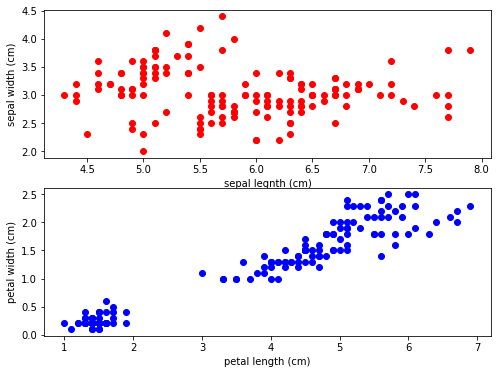

In [11]:
#모듈 불러오기
import pandas as pd

#iris 데이터를 데이터프레임화 시키기
f_names = iris['feature_names']
data = iris['data']
df = pd.DataFrame(data, columns = f_names)

#column이름 재설정
df.rename(columns = {'sepal length (cm)' : 'sepal length',
           'sepal width (cm)' : 'sepal width',
           'petal length (cm)' : 'petal length',
           'petal width (cm)' : 'petal width'}, inplace = True)

#산점도 그리기
plt.figure(figsize = (8,6))
plt.subplot(2,1,1)
plt.scatter(df['sepal length'], df['sepal width'], c = 'red')
plt.xlabel('sepal legnth (cm)')
plt.ylabel('sepal width (cm)')
plt.subplot(2,1,2)
plt.scatter(df['petal length'], df['petal width'], c = 'blue')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

#문제4

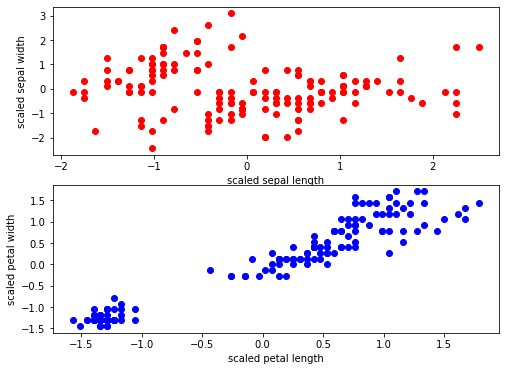

In [12]:
mean = np.mean(df['sepal length'], axis = 0)
std = np.std(df['sepal length'], axis = 0)
scaled_sl = (df['sepal length'] - mean) / std

mean = np.mean(df['sepal width'], axis = 0)
std = np.std(df['sepal width'], axis = 0)
scaled_sw = (df['sepal width'] - mean) / std

mean = np.mean(df['petal length'], axis = 0)
std = np.std(df['petal length'], axis = 0)
scaled_pl = (df['petal length'] - mean) / std

mean = np.mean(df['petal width'], axis = 0)
std = np.std(df['petal width'], axis = 0)
scaled_pw = (df['petal width'] - mean) / std

fig = plt.figure(figsize = (8,6))
plt.subplot(2,1,1)
plt.scatter(scaled_sl, scaled_sw, c = 'red')
plt.xlabel('scaled sepal length')
plt.ylabel('scaled sepal width')
plt.subplot(2,1,2)
plt.scatter(scaled_pl, scaled_pw, c = 'blue')
plt.xlabel('scaled petal length')
plt.ylabel('scaled petal width')
plt.show()

#5번

In [13]:
from sklearn import datasets,preprocessing
import numpy as np
from matplotlib import pyplot as plt

wine = datasets.load_wine(as_frame=True)

x_scaled = preprocessing.scale(wine.data)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, wine.target, test_size= 0.25)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 5)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9333333333333333

KNeighborsClassifier 함수에서 n_neighbors는 knn 모델을 학습시키기 전에 몇 개의 이웃을 참고해서 모델을 학습시킬 것인지 정하는 인자이다. default 값은 5이다